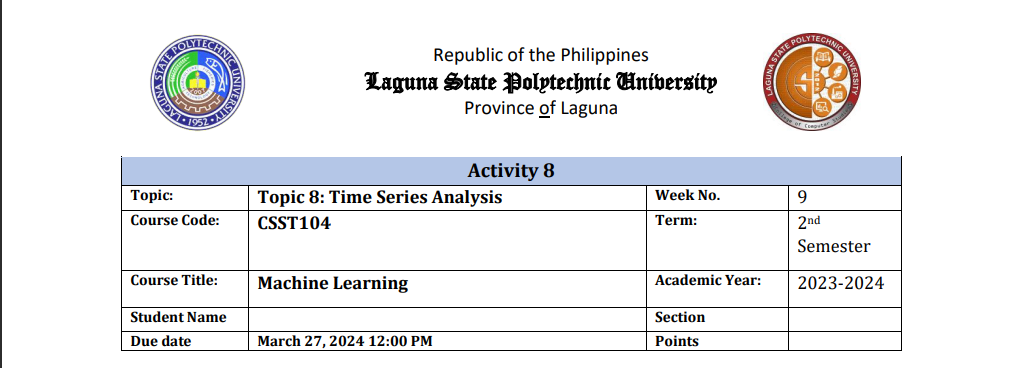

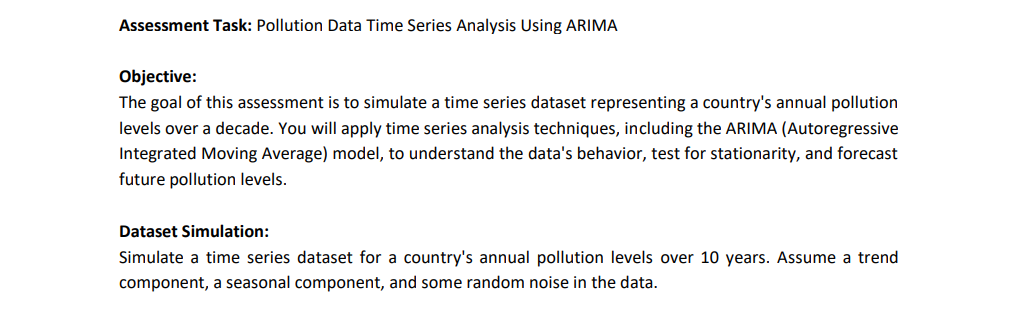

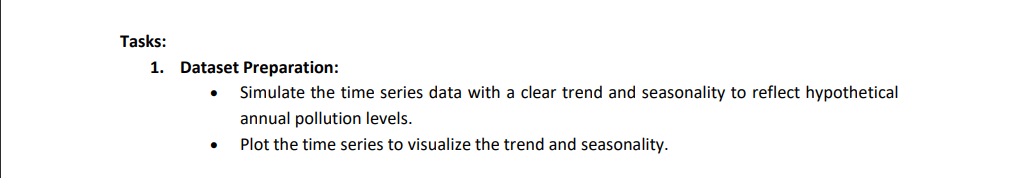

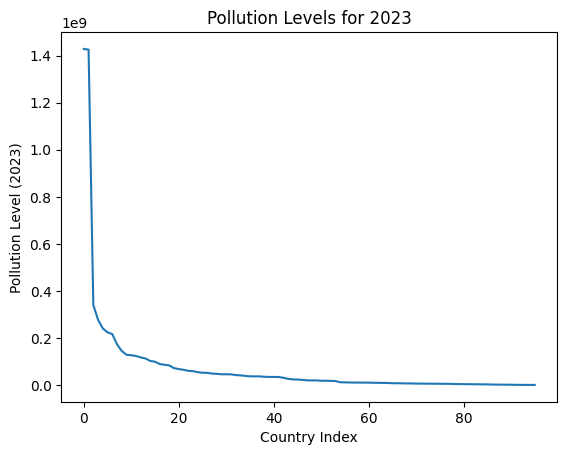

In [73]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

data = pd.read_csv('most-polluted-countries.csv')

pollution_2023 = data['pollution_2023']
pollution_growth_rate = data['pollution_growth_Rate']

# Plot the pollution levels for 2023
plt.plot(pollution_2023.index, pollution_2023.values)
plt.xlabel('Country Index')
plt.ylabel('Pollution Level (2023)')
plt.title('Pollution Levels for 2023')
plt.show()


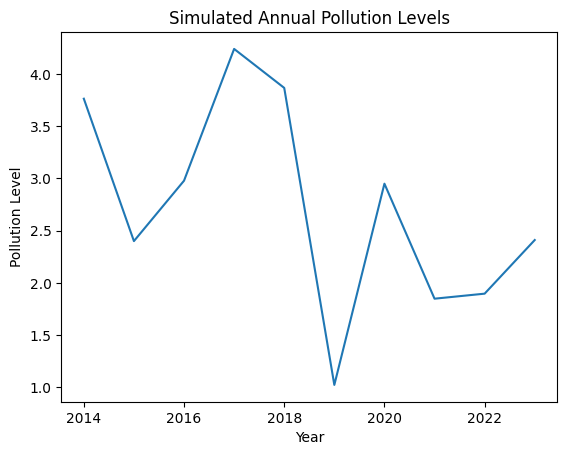

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Time index simulated (years)
years = np.arange(2014, 2024)
trend = 2

seasonal_amplitude = 2
seasonal_period = 1
seasonal = seasonal_amplitude * np.sin(2 * np.pi * years / seasonal_period)

np.random.seed(0)
noise = np.random.normal(0, 1, len(years))
pollution_levels = trend + seasonal + noise
simulated_data = pd.DataFrame({'Year': years, 'Pollution': pollution_levels})

# Plot the simulated time series data
plt.plot(simulated_data['Year'], simulated_data['Pollution'])
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.title('Simulated Annual Pollution Levels')
plt.show()


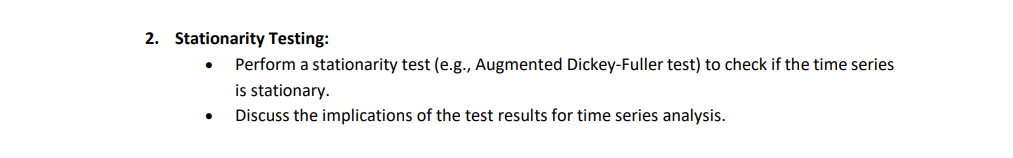

In [75]:
from statsmodels.tsa.stattools import adfuller

#Augmented Dickey-Fuller test
result = adfuller(simulated_data['Pollution'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpretation
if result[1] < 0.05:
    print('The time series is stationary (reject the null hypothesis).')
else:
    print('The time series is not stationary (fail to reject the null hypothesis).')


ADF Statistic: -2.749602226626118
p-value: 0.06584112674810402
The time series is not stationary (fail to reject the null hypothesis).


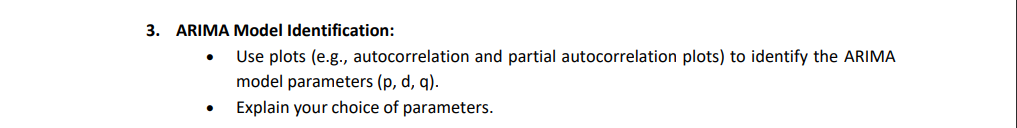

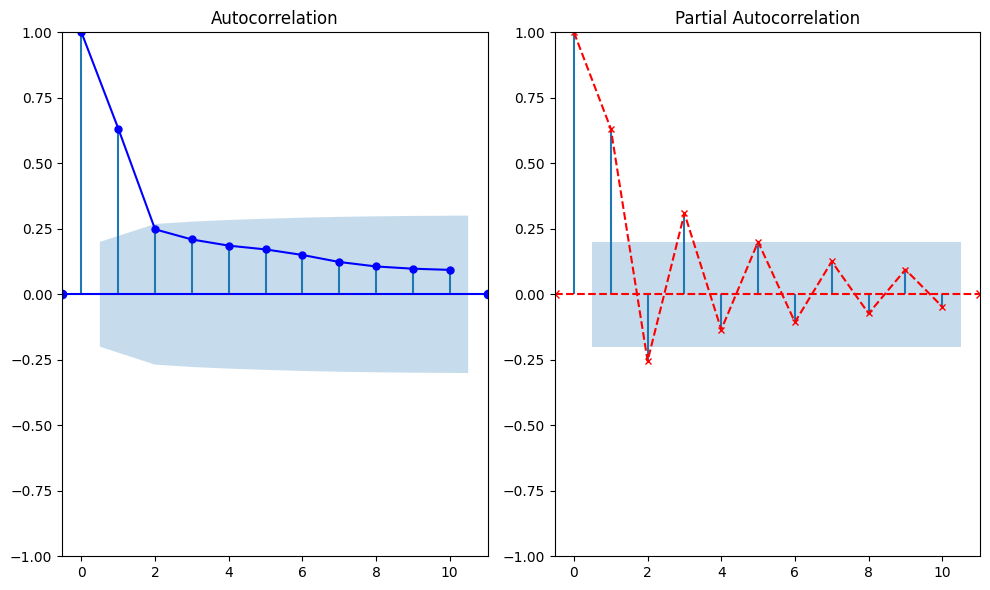

In [76]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pollution_levels = data['pollution_2023']

#Parameters
plot_params_acf = {'lags': 10, 'marker': 'o', 'linestyle': '-', 'color': 'blue'}
plot_params_pacf = {'lags': 10, 'marker': 'x', 'linestyle': '--', 'color': 'red'}

# Plots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

#Autocorrelation Function (ACF)
axes[0].set_title("Autocorrelation Function (ACF)")
plot_acf(pollution_levels, ax=axes[0], **plot_params_acf)

#Partial Autocorrelation Function (PACF)
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plot_pacf(pollution_levels, ax=axes[1], **plot_params_pacf)
plt.tight_layout()
plt.show()



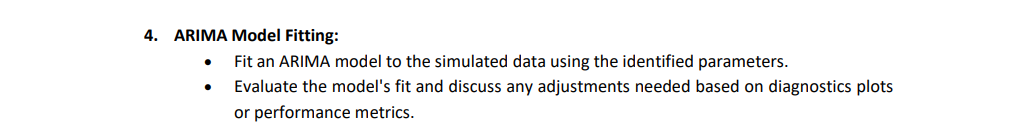

In [77]:
model = ARIMA(data['pollution_2023'], order=(1, 0, 1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:         pollution_2023   No. Observations:                   96
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -19209.350
Date:                Thu, 28 Mar 2024   AIC                          38426.699
Time:                        08:44:03   BIC                          38436.957
Sample:                             0   HQIC                         38430.845
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.405e+07   3.83e-14   1.93e+21      0.000    7.41e+07    7.41e+07
ar.L1          0.9999   1.85e-05   5.41e+04      0.000       1.000       1.000
ma.L1          0.0608      0.006     10.108      0.0

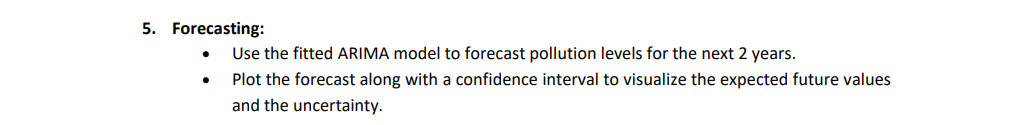

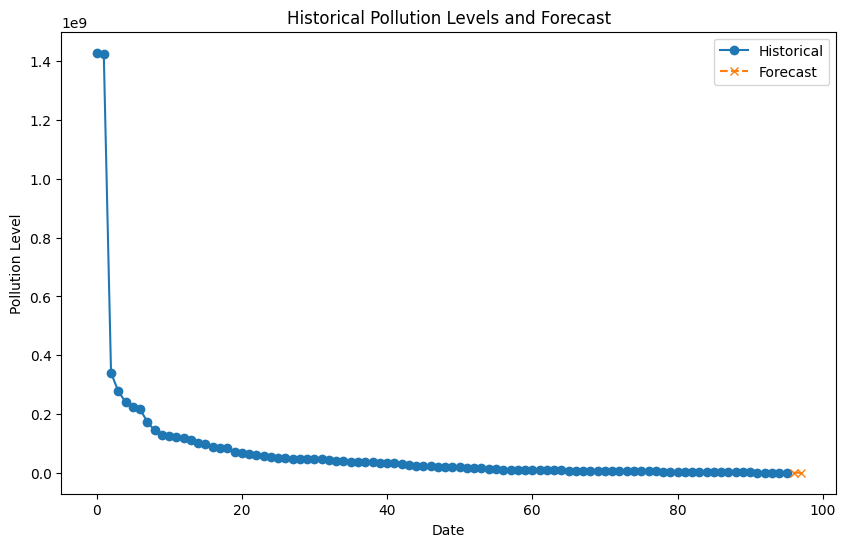

In [78]:
# 2 YEARS
forecast = results.forecast(steps=2)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['pollution_2023'], linestyle='-', label='Historical', marker='o')
plt.plot(forecast.index, forecast, linestyle='--', label='Forecast', marker='x')

plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.title('Historical Pollution Levels and Forecast')
plt.legend()

# Display the plot
plt.show()


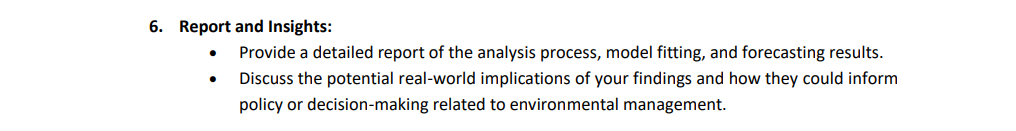


# **Reports and Insights:**
The analysis included using a specialized model to predict pollution levels in the upcoming years based on past data trends. By studying how pollution levels behaved over time, we were able to create a forecast that gives us an idea of what to expect in the future.

Based on the analysis within this forecast, for the next 2 years, it suggests that there would be a lower percentage of pollution.

We can utilize this information in the real - world for making decisions about how to manage the environment better. For example, it can help policymakers and environmentalists plan strategies to reduce pollution, protect ecosystems, and improve overall environmental health.